# TUTORIAL: Train YOLOv8 for Rock / Paper / Scissors game

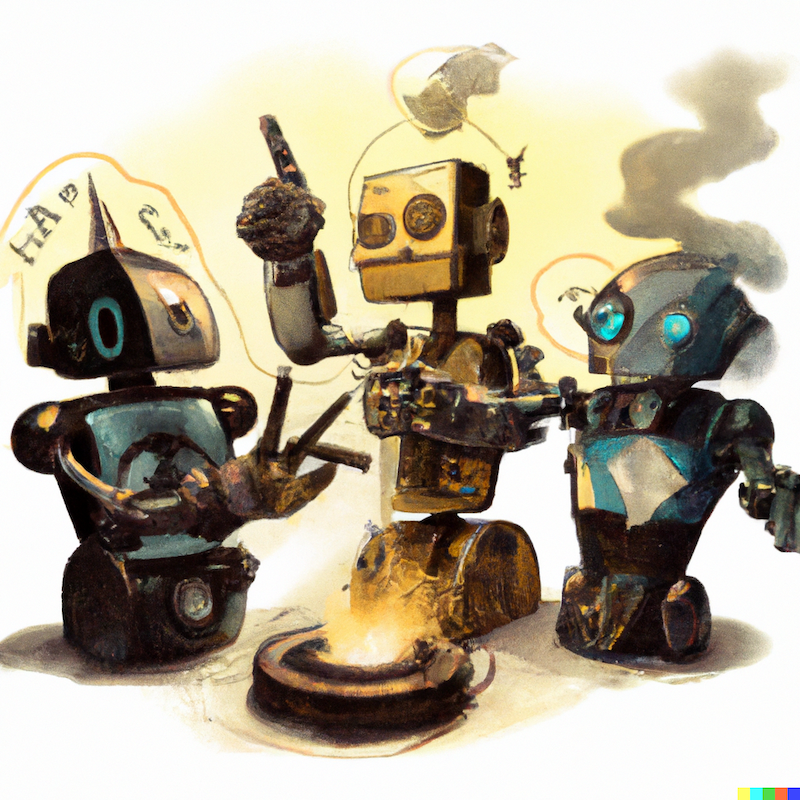

*A guide to use Transfer Learning on YOLOv8 in order to play to the Rock / Paper / Scissors game through an AI Notebook.*

## Introduction

The purpose of this tutorial is to show how it is possible to train YOLOv8 to play to the game "rock paper scissors"!
YOLOv8 is an object detection algorithm. Although closely related to image classification, object detection performs image classification on a more precise scale. Object detection locates and categorizes features in images.

It is based on the YOLOv8 open source [repository](https://github.com/ultralytics/ultralytics).

## Code

The different steps are as follow:

- Download the Rock / Paper / Scissors Dataset
- Install YOLOv8 dependencies
- Import dependencies and check GPU availability
- Retrieve pre-trained YOLOv8 model weights
- Test the model on a scissors example
- Run YOLOv8 training on 🪨 / 📃 / ✂️ Dataset
- Display results of YOLOv8 training on 🪨 / 📃 / ✂️ Dataset
- Test your YOLOv8 custom model on the 🪨 / 📃 / ✂️ Dataset
- Run YOLOv8 inference on new images
- Export trained weights for future inference

# Download the Rock / Paper / Scissors Dataset

The Rock / Paper / Scissors Dataset is available on <a href="https://universe.roboflow.com/roboflow-58fyf/rock-paper-scissors-sxsw">Roboflow</a>.

If you want to use this **Public Dataset** on the tutorial, follow the next requirements:

- create a Roboflow account
- click on `Download this dataset` in order to download the collection of data
- select `YOLO v8` format
- choose the method `show download code`
- confirm by clicking on the `Continue` button

In the window that opens, click on the `>_ Terminal` tab. You will get a `curl` command, followed by your `<dataset_url>`, that will allow you to download your dataset directly inside the notebook.

To download it, replace `<dataset_url>` with yours in the following command:

In [ ]:
# go to the folder corresponding to your object container
%cd /workspace/attendee

# unzip downloaded dataset zip file silently (-q for quiet mode)
# make sure to prefix the curl command with a ! to ensure that it is executed as a shell command (instead of Python)
!curl -L "https://storage.gra.cloud.ovh.net/v1/AUTH_2b59f4f857964cc28bb66c7155b6c8d9/workshop-resources/Rock-Paper-Scissors-SXSW.v12i.yolov8.zip" > roboflow.zip; unzip -q roboflow.zip; rm roboflow.zip

## Install YOLOv8 dependencies
The easiest way to use YOLOv8 is to install Python dependency for ultralytics

In [ ]:
pip install ultralytics -U

## Import dependencies and check GPU availability

In [2]:
import ultralytics
from ultralytics import YOLO

ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.11.4 torch-2.2.1+cu121 CUDA:0 (Tesla V100S-PCIE-32GB, 32501MiB)
Setup complete ✅ (60 CPUs, 172.7 GB RAM, 735.8/3519.5 GB disk)


## Retrieve pre-trained YOLOv8 model weights

In this tutorial, we will do **Transfer Learning** based on a YOLOv8 model pre-trained on the <a href="https://cocodataset.org/">COCO dataset</a>.

**How to define Transfer Learning?**

For both humans and machines, learning something new takes time and practice. However, it is easier to perform similar tasks to those already learned. As with humans, AI will be able to identify patterns from previous knowledge and apply them to new learning.

If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data.

Main advantages of Transfer Learning:

- saving resources
- improving efficiency
- model training facilitation
- saving time

**What is the COCO dataset?**

COCO is a large-scale object detection, segmentation, and also captioning dataset. COCO has several features:

- Object segmentation
- Recognition in context
- Superpixel stuff segmentation
- 330K images
- 1.5 million object instances
- 80 object categories
- 91 stuff categories
- 5 captions per image
- 250 000 people with keypoints

In [4]:
# Get the weights of the pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

## Test the model on a scissors example

The aim of this test is to show that the pre-trained model is currently unable to recognize the rock / paper / scissors game.

You can consult the [Ultralytics Predict Documentation](https://docs.ultralytics.com/modes/predict/) for guidance.

In [ ]:
model.predict(source='/workspace/101-AI-and-py/docs/assets/scissors.jpg', conf=0.5, save=True)

By running this function, you will obtain an output in which the first line indicates the element(s) detected within the image. 

**Parameters definition**

Within this function, we specify:
- The `source` from which we want our prediction (can be an image path, video file, directory, URL, ...).
- The minimum confidence threshold `conf`. Detections with confidence below this threshold will be disregarded.
- A `save=True` parameter, which allow us to view the resulting image, which will be stored in the path indicated in the function output.

FYI, you could also have run `model(image)`, which would also have given you the prediction. But the `predict()` function allows you to specify more parameters (save, conf, ...).

## Run YOLOv8 training on 🪨 / 📃 / ✂️ dataset

You can consult the [Ultralytics Train Documentation](https://docs.ultralytics.com/modes/train/) for guidance.

In [ ]:
result = model.train(data='/workspace/attendee/data.yaml', device=0, epochs=5, verbose=True, batch=64, freeze=10)

**Parameters definitions**:

- `data`: refers to the path to the dataset `.yaml` file.
- `device`: determines the device on which the model will be trained (we want to use GPU).
- `epochs`: refers to the number of training epochs. An epoch corresponds to one training cycle through the full training dataset.
- `verbose`: to display some additional execution logs.

**Advanced parameters**:
- `batch`: Number of images used for one training iteration before updating the model's weights. A larger batch size can lead to faster training but requires more memory.
- `freeze`: Allow to freeze certain layers of a pre-trained model. This way, these layers are kept unchanged during training, which allows to preserve knowledge from the pre-trained model.

## Display results of YOLOv8 training on 🪨 / 📃 / ✂️ dataset

According to the last line of the training output, your results have been saved in the `runs/detect/train` folder. This folder contains several images, showing the performance of the trained model.

Let's display these images one by one and analyse them to understand how your trained model behaves !

### Confusion Matrix

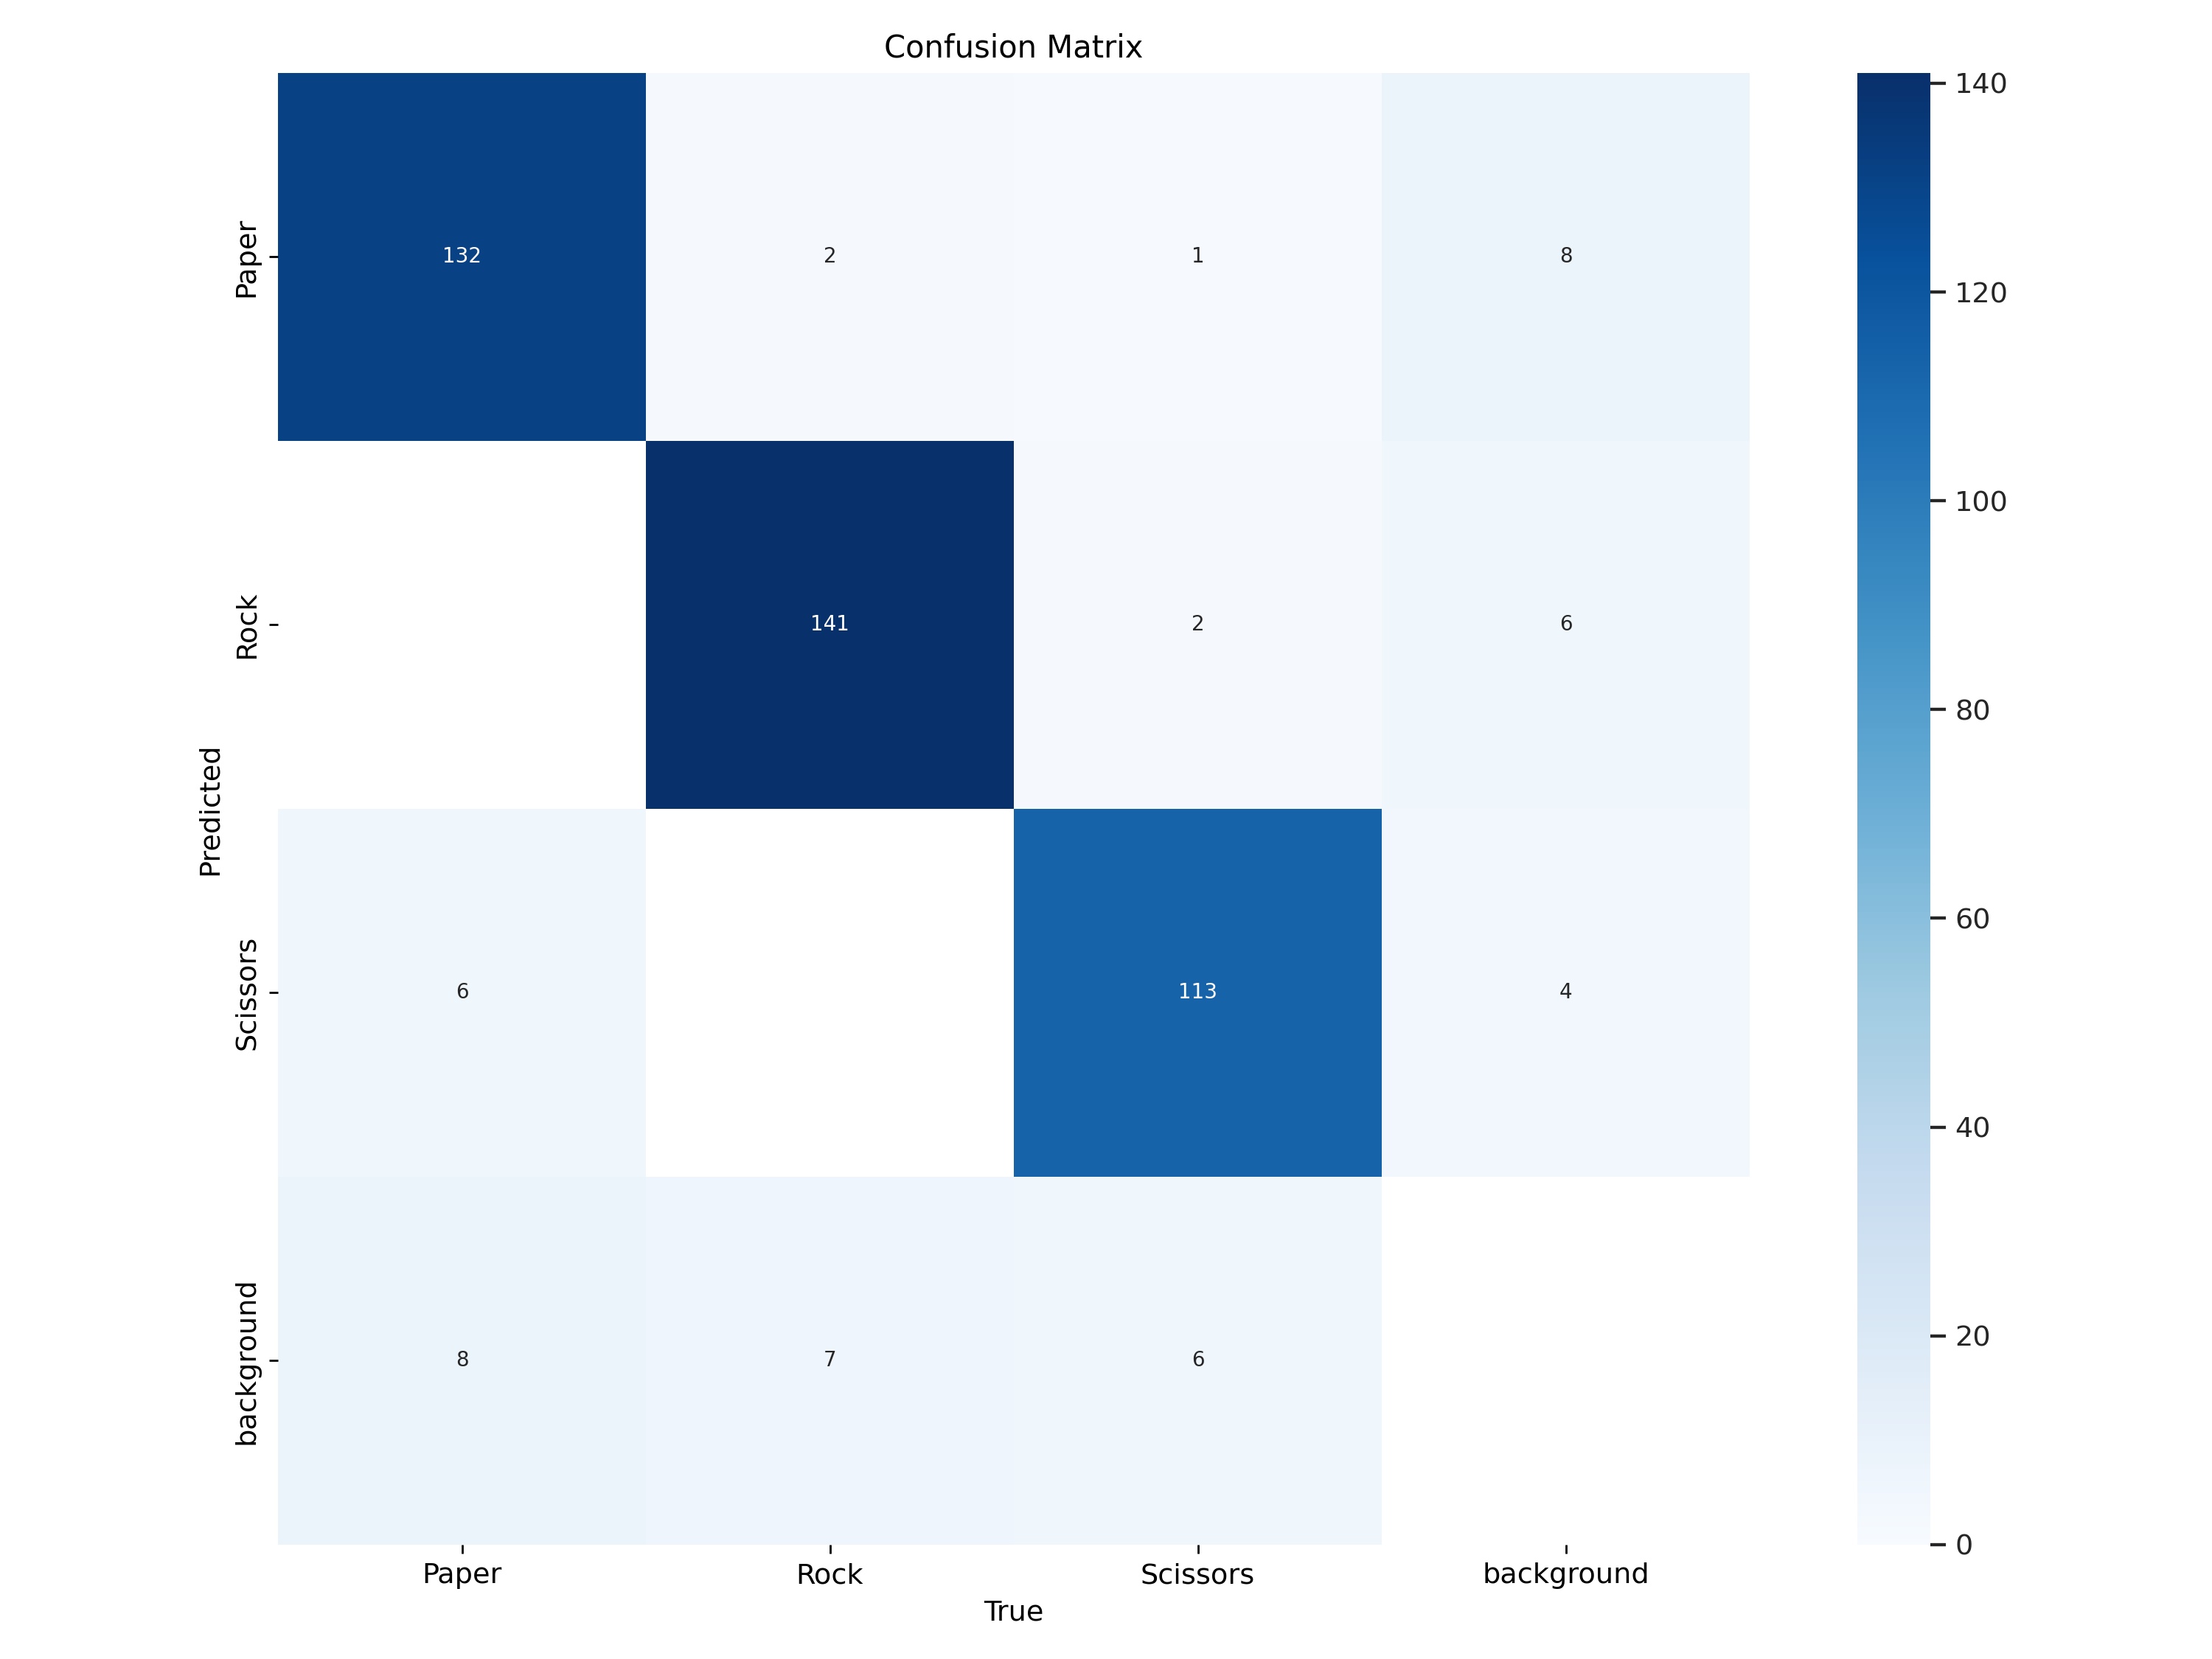

In [2]:
# to display images
from IPython.display import Image

# display the confusion matrix image
Image(filename='/workspace/attendee/runs/detect/train/confusion_matrix.png', width=1000)

The matrix shows that the model correctly identified 132 instances of "Paper", 141 instances of "Rock", and 113 instances of "Scissors". It also shows that some instances were incorrectly classified.

Overall, this matrix suggests that the model performs well in recognizing 'Rock', 'Paper', and 'Scissors' gestures, but there is still room for improvement with further training, given that the model has only been trained for 5 epochs.

You can also vizualise the normalized confusion matrix file `confusion_matrix_normalized.png`, which represents the data in proportions rather than raw counts.

### Groundtruth & Predicted Batch examples

To better understand these numbers and see how well the model detects and classifies objects in images, we can vizualize and compare the ground truth labels for a set of images with the predictions made by the model for those same images. By visualizing the label and prediction images side by side, we can easily see how well the model is doing and where it might be making mistakes.

These results are available for both the training set and the validation one.

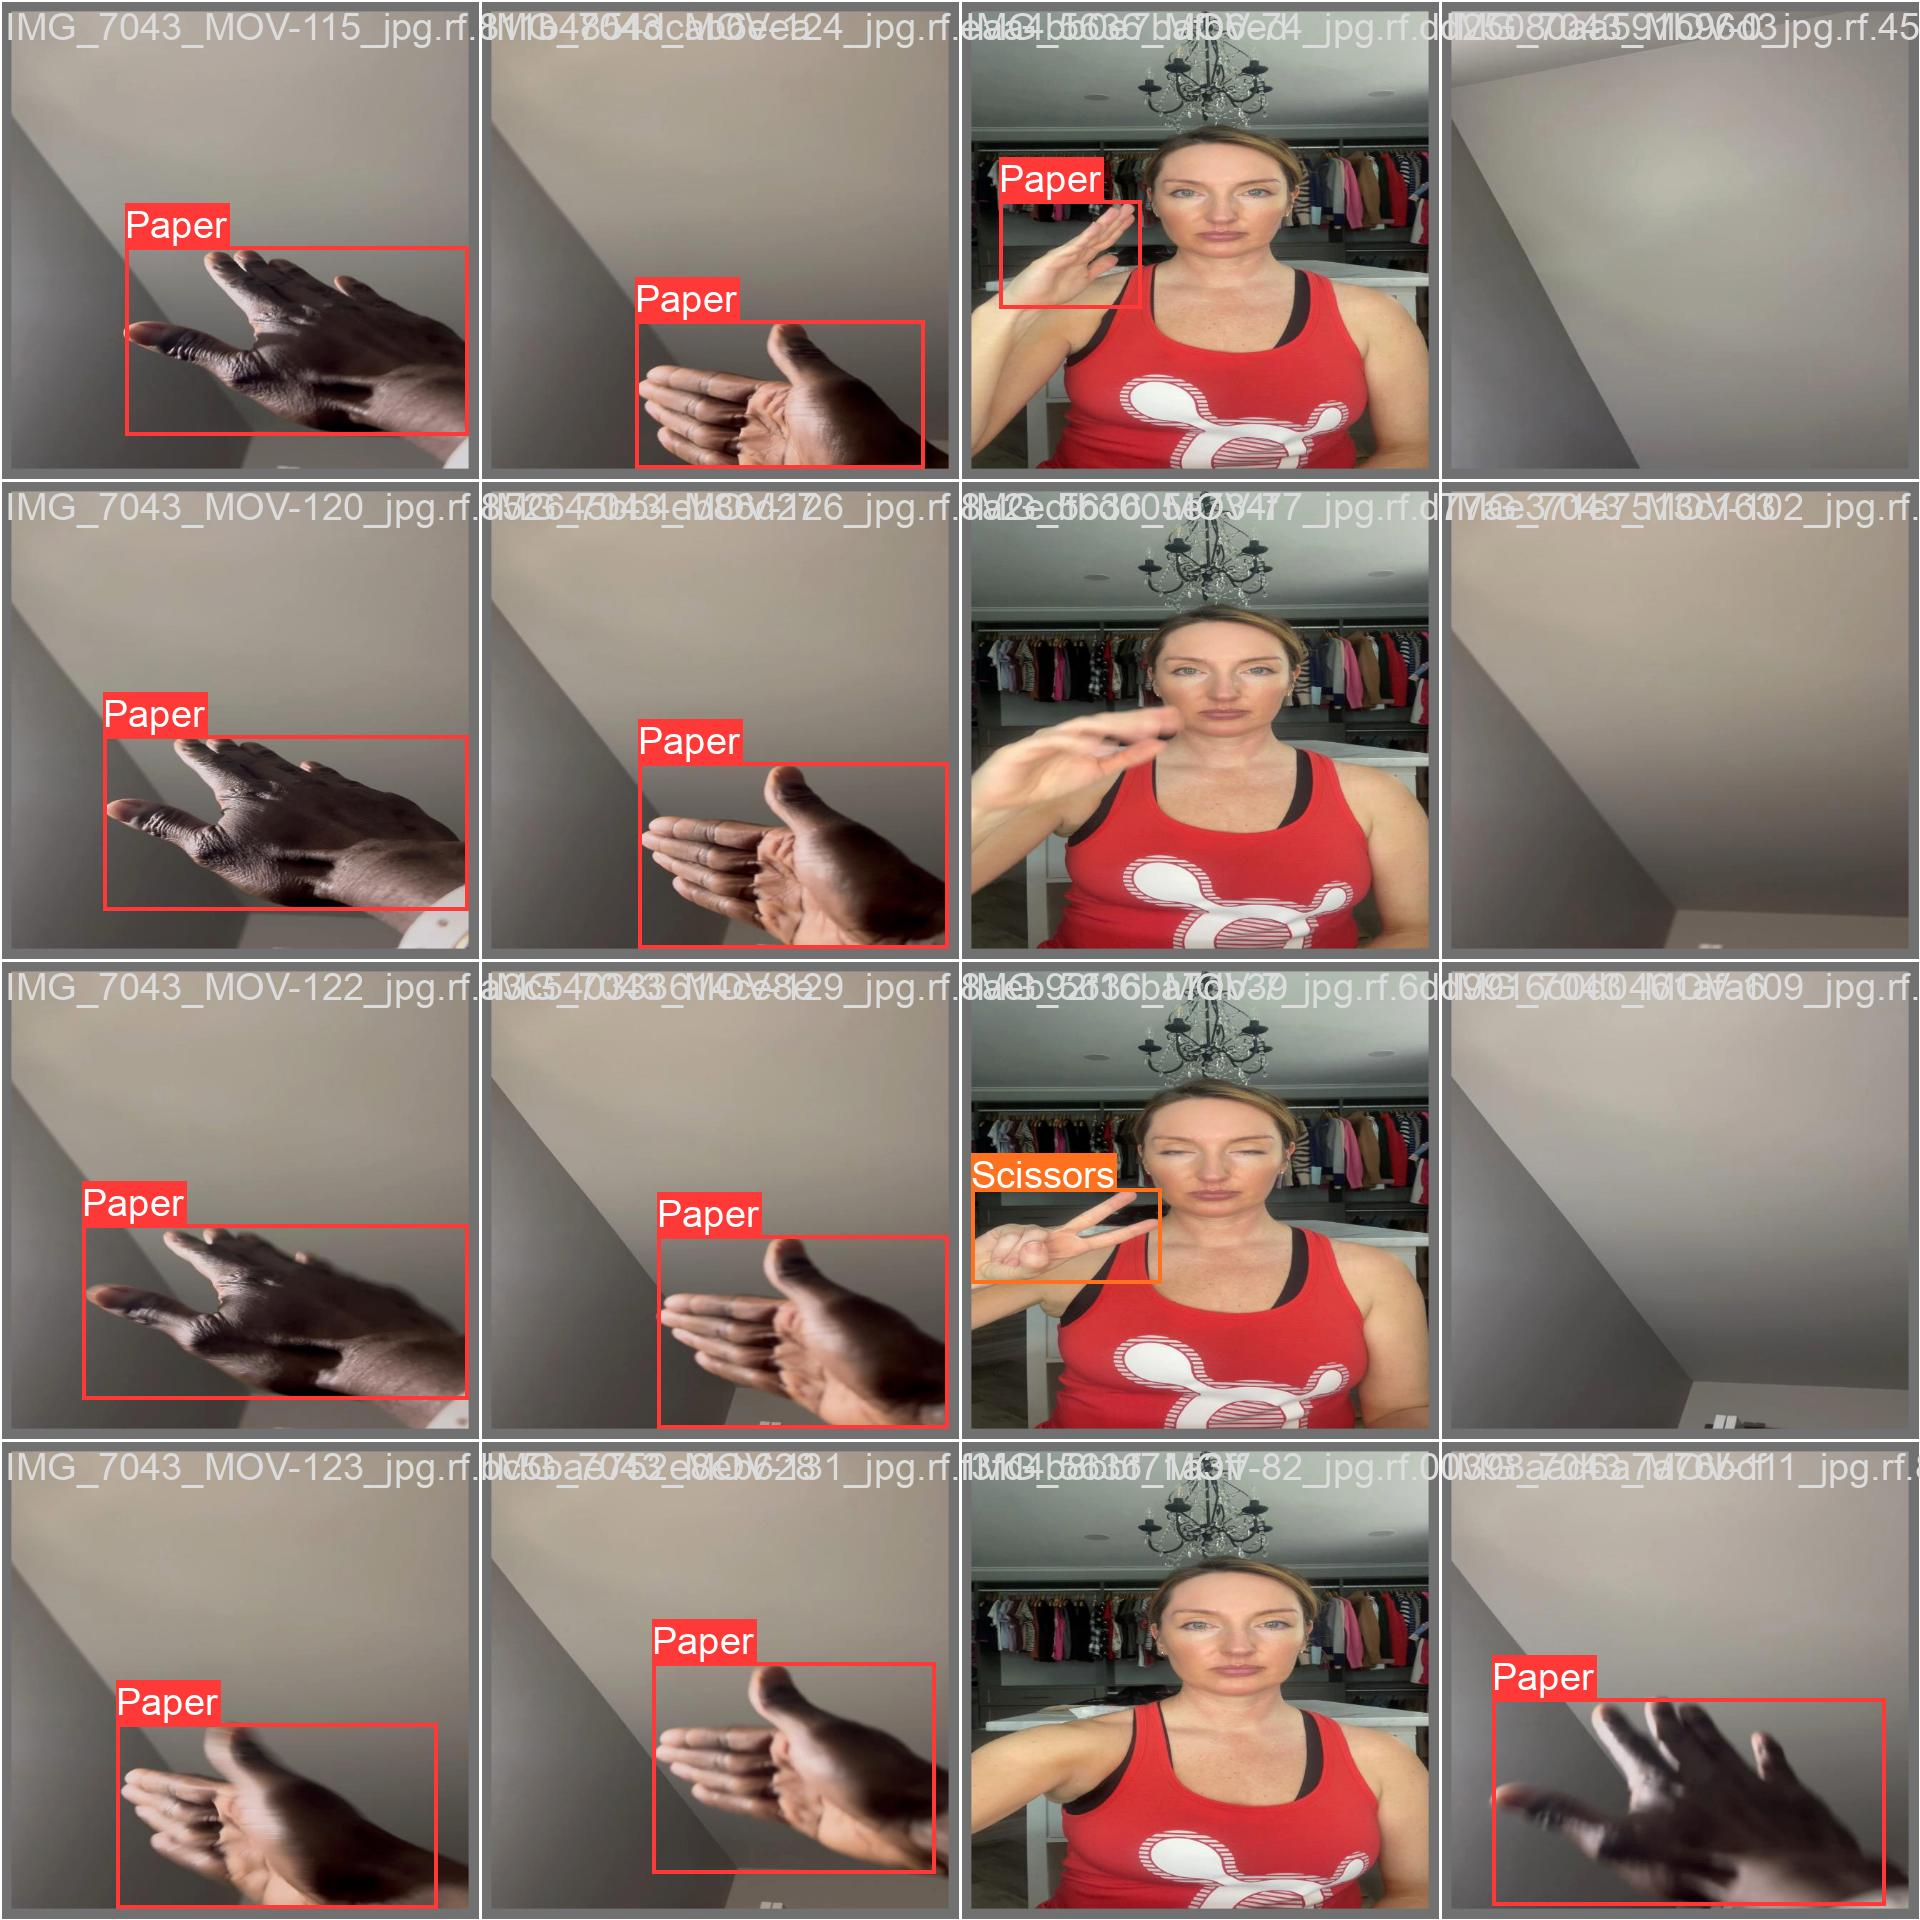

In [9]:
Image(filename='/workspace/attendee/runs/detect/train/val_batch2_labels.jpg', width=600)

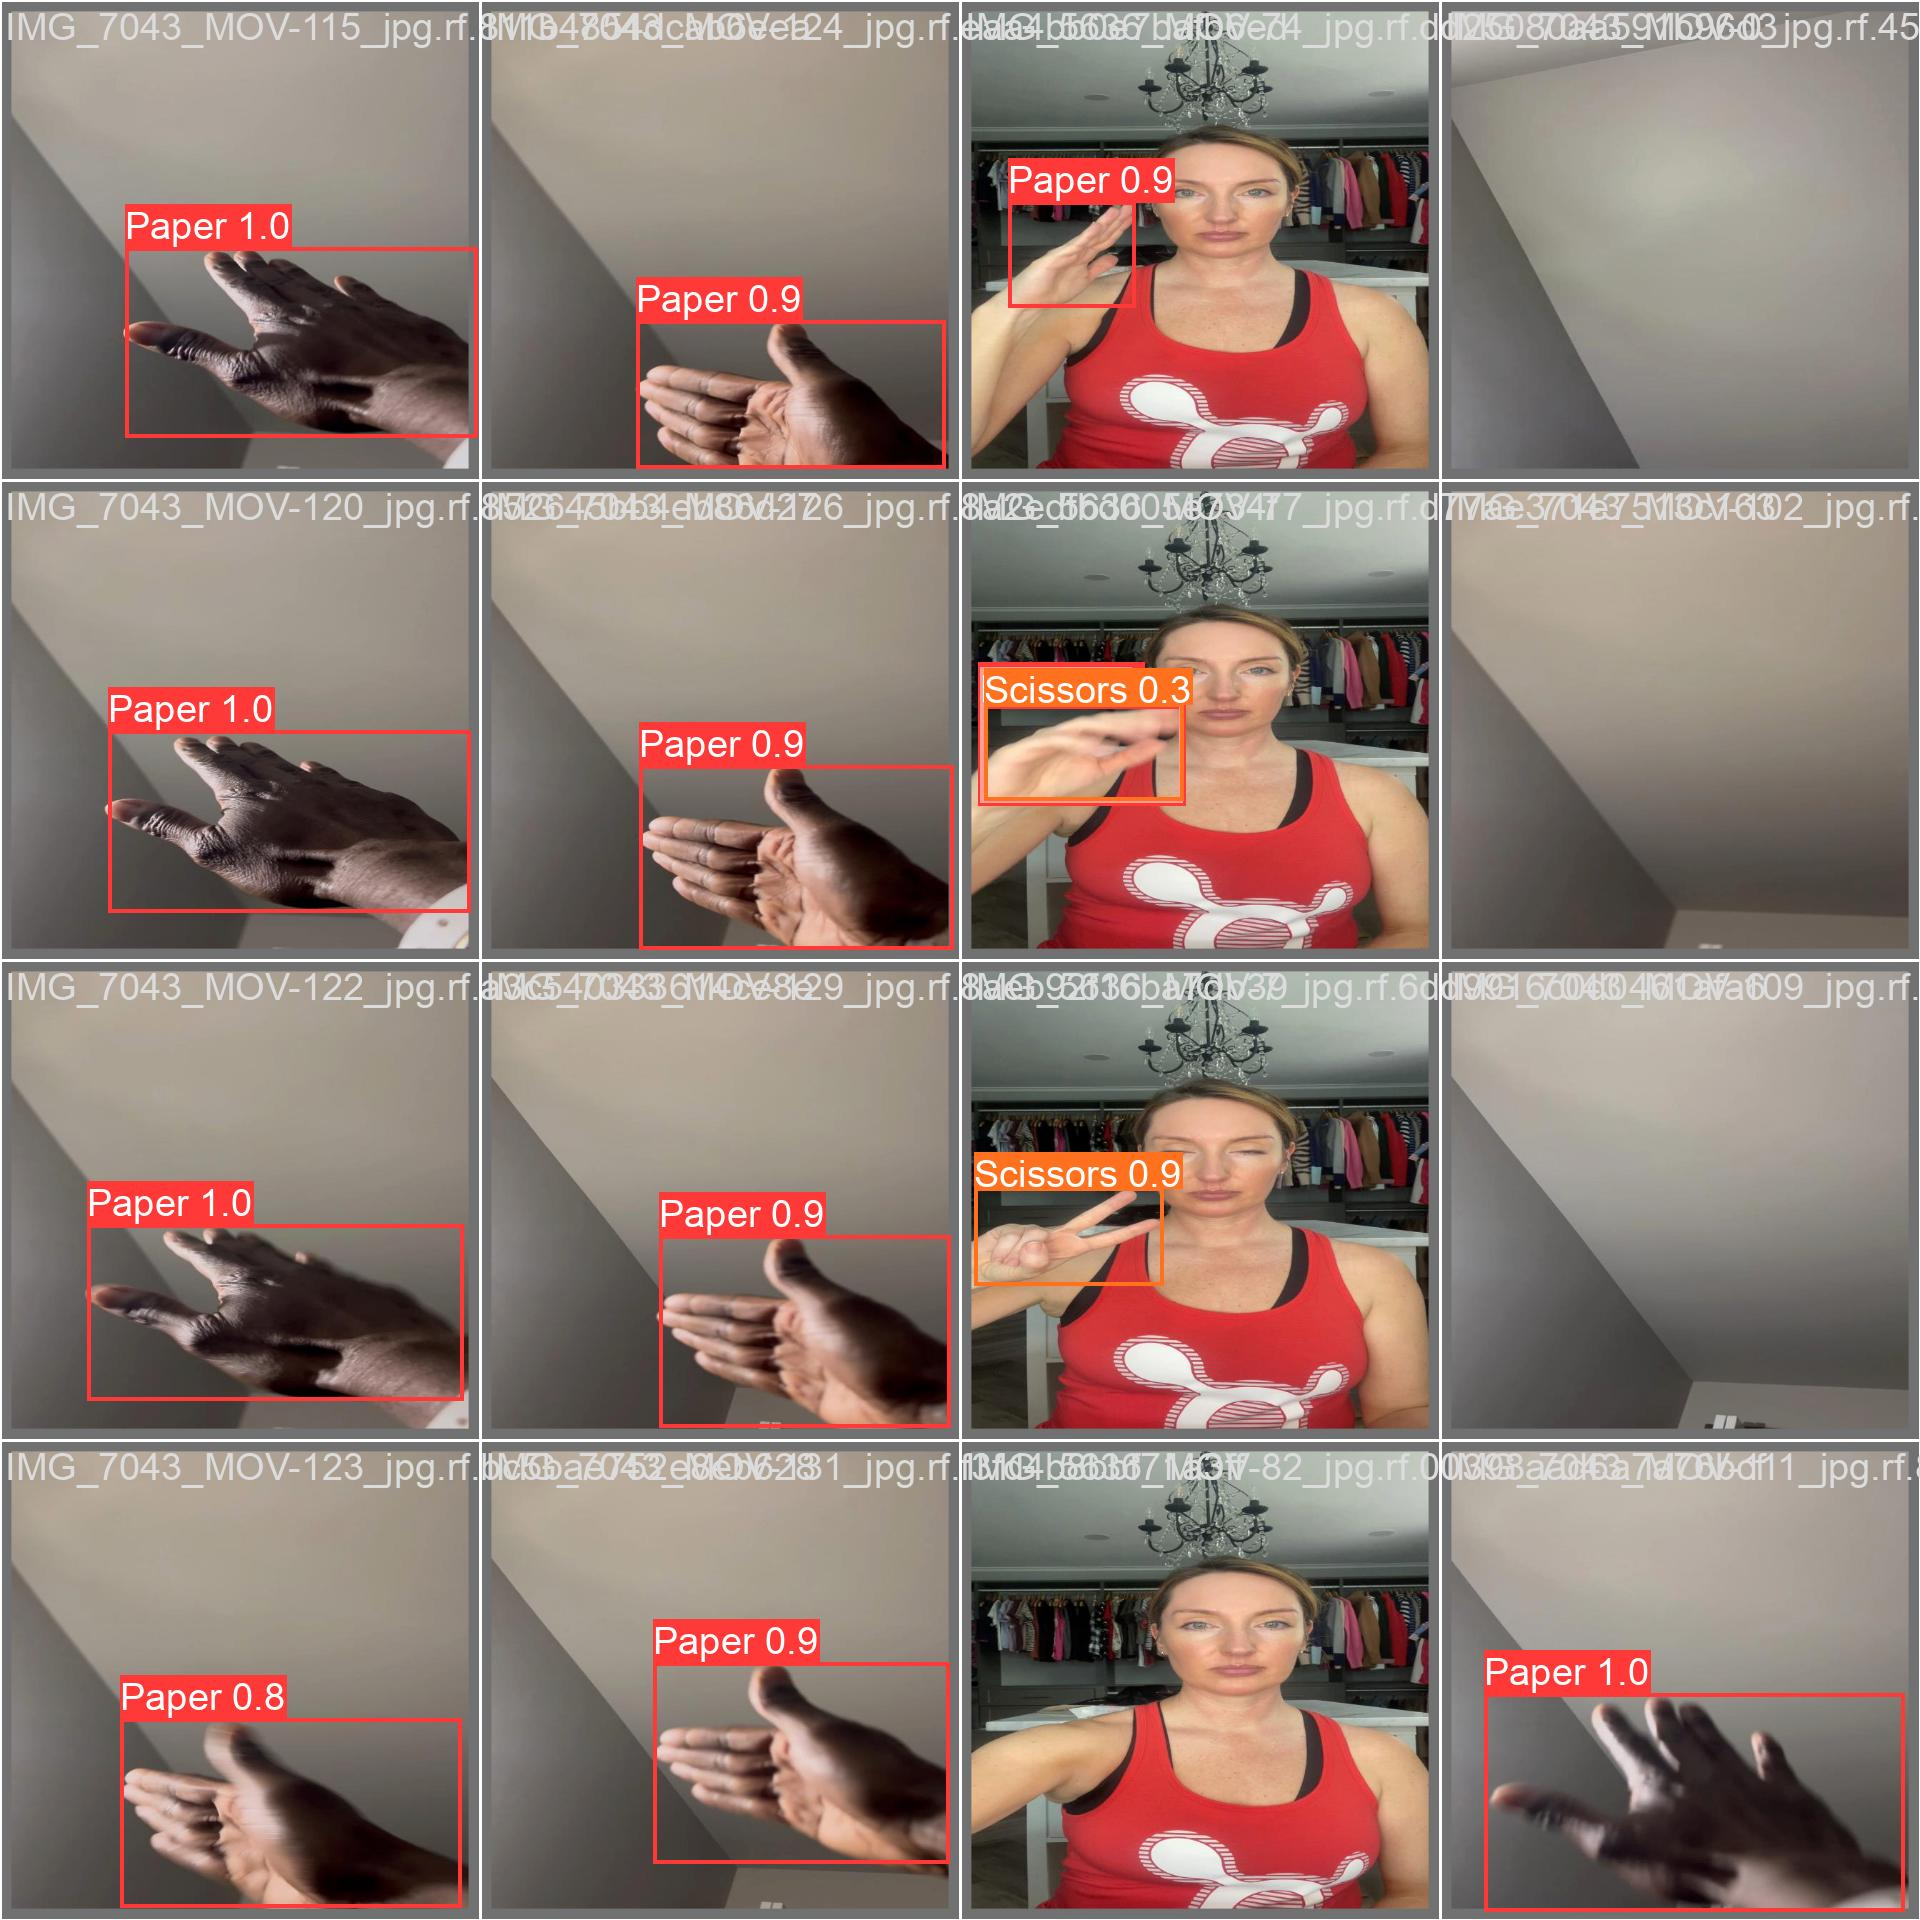

In [10]:
Image(filename='/workspace/attendee/runs/detect/train/val_batch2_pred.jpg', width=600)

If we compare these two images, we can see that the model performs extremely well. In the images studied, it made only one mistake, recognising a Scissors when there was none. However, the model was not very confident for this prediction, since it indicated a confidence index of 0.3, which can be filtered out later by setting a threshold (only keep the detections > 0,6 for example).

### Precision, Recall, F1 curves

In the context of object detection & classification, **Precision**, **Recall**, and the **F1 score** are commonly used metrics to evaluate the performance of a model. Here's a brief explanation of each metric:

- **Precision**: Precision is the measure of the number of true positive predictions made by the model out of all positive predictions made. In other words, it tells us what proportion of the objects detected by the model are actually present in the image.

- **Recall**: Recall is the measure of the number of true positive predictions made by the model out of all actual positive instances in the dataset. In other words, it tells us what proportion of the objects present in the image are correctly detected by the model. A high recall score indicates that the model is good at detecting all instances of an object.

- **F1 score**: The F1 score is the harmonic mean of precision and recall, which balances both metrics to provide a single measure of the model's performance. It is a weighted average of precision and recall, with more weight given to the lower of the two scores. An F1 score of 1 means that the model has perfect precision and recall.

By computing these metrics, we can get a better understanding of how well the model is performing and identify areas where it might need improvement. A good model should have both high precision and recall, resulting in a high F1 score.

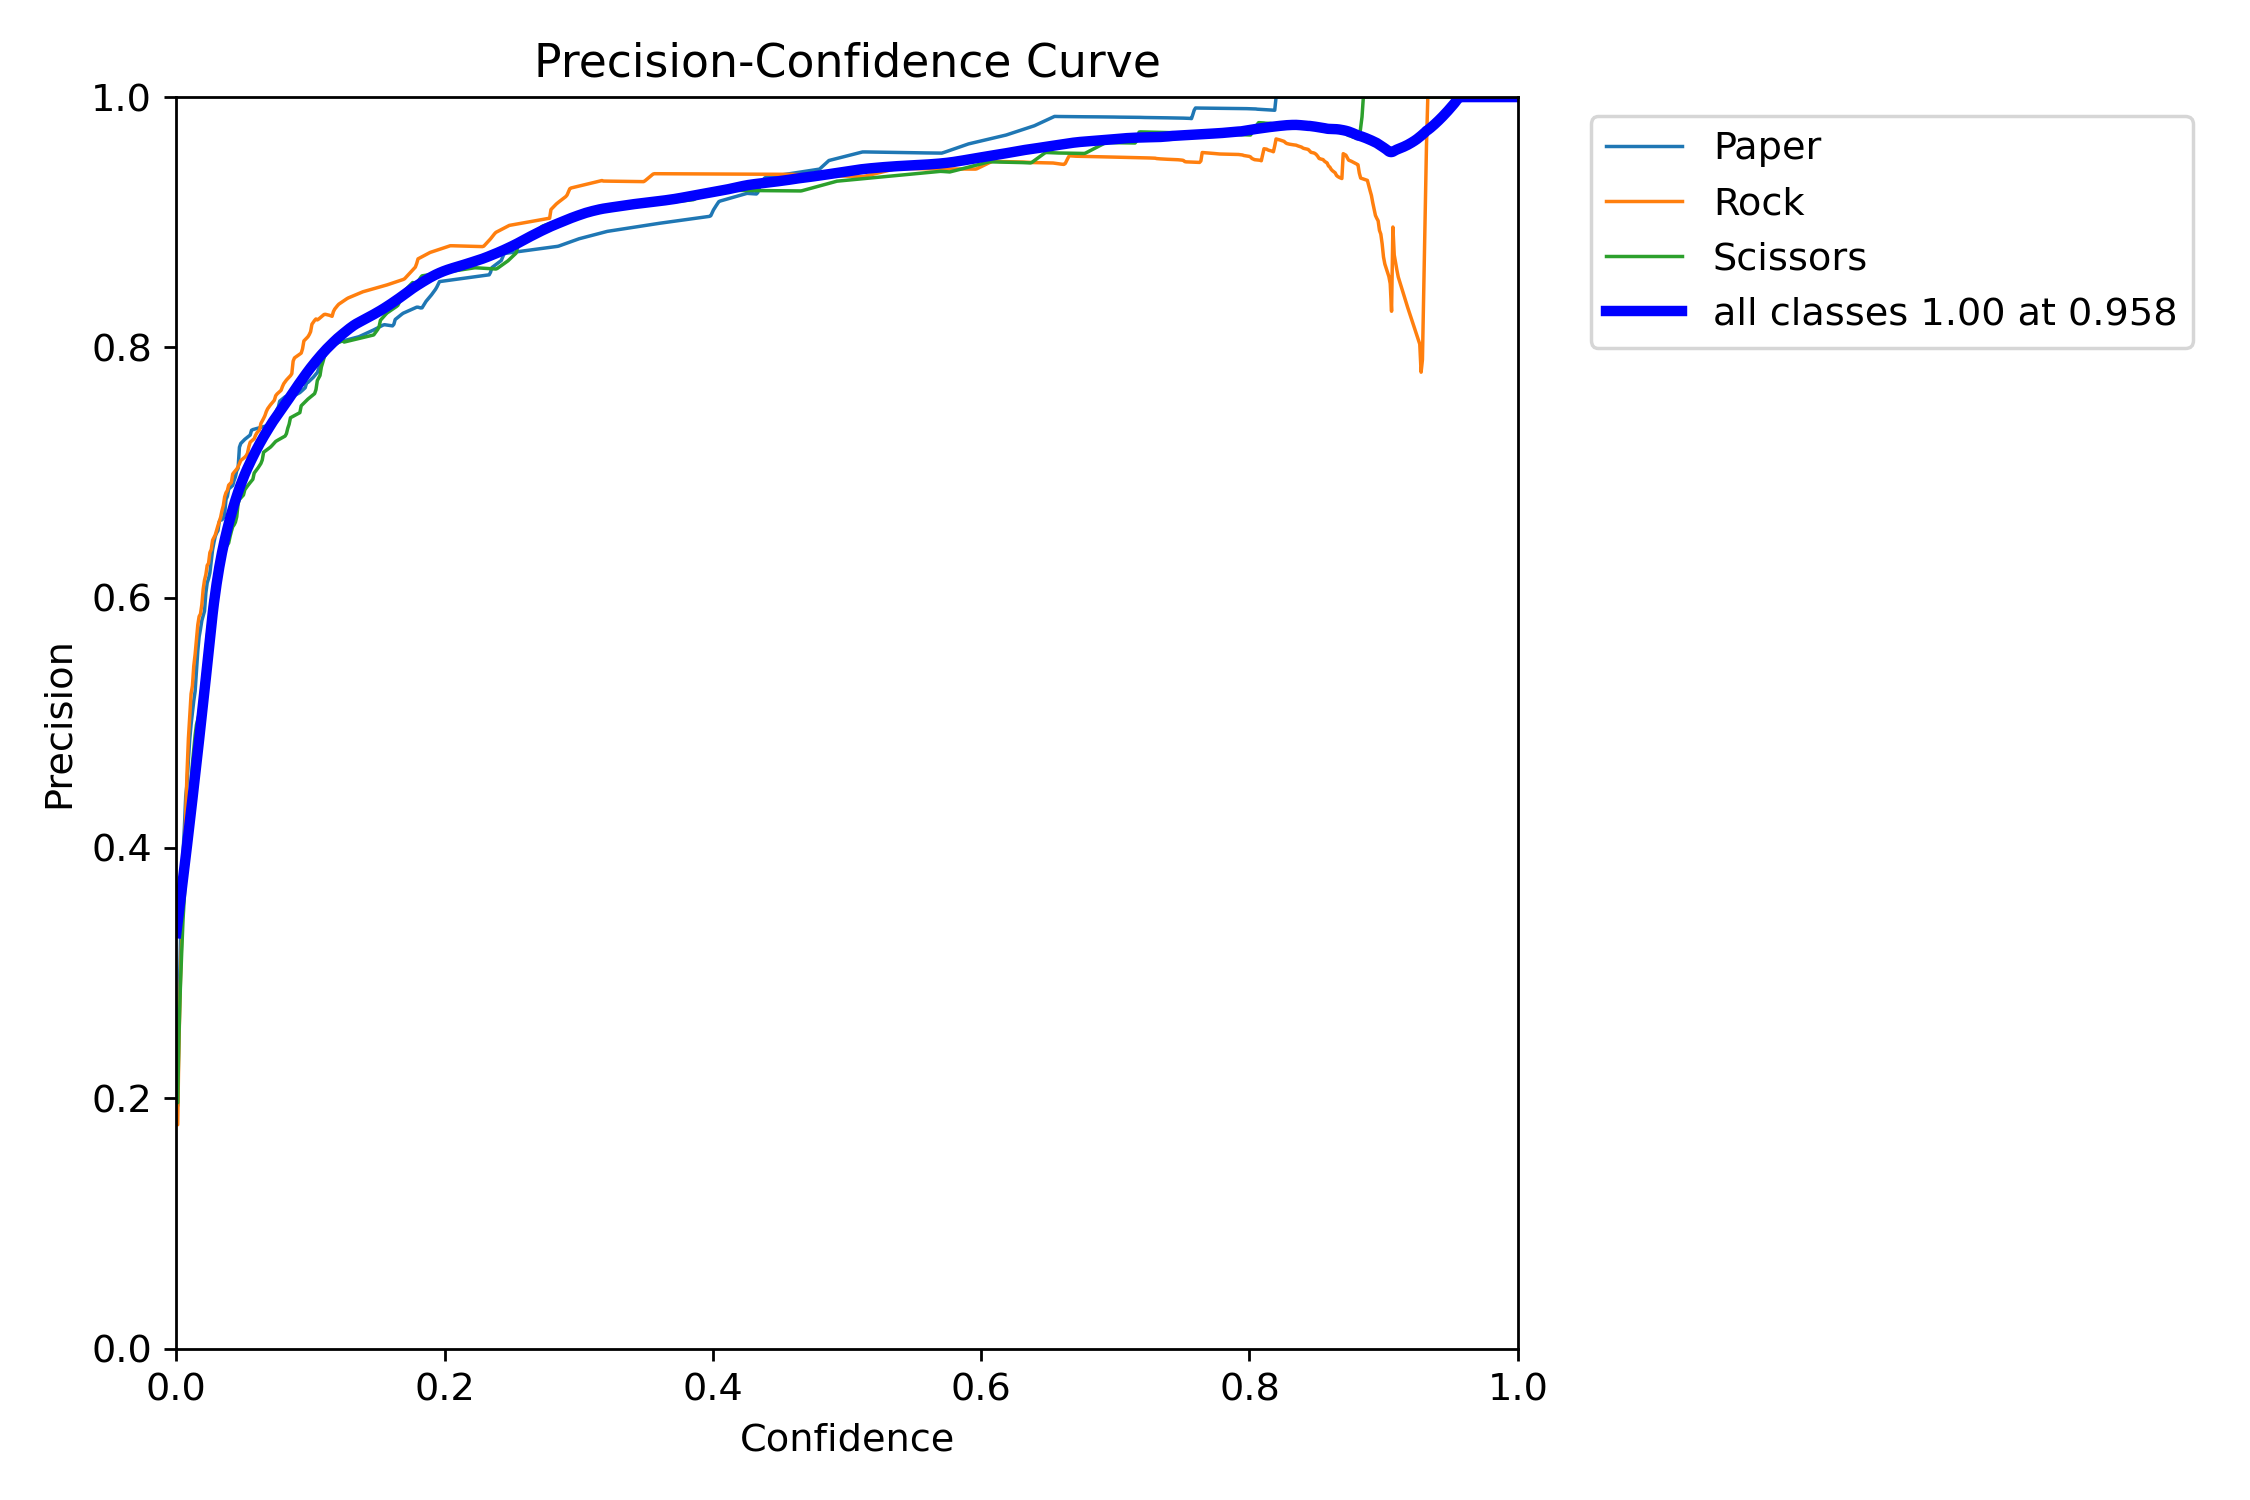

In [11]:
Image(filename='/workspace/attendee/runs/detect/train/P_curve.png', width=600)

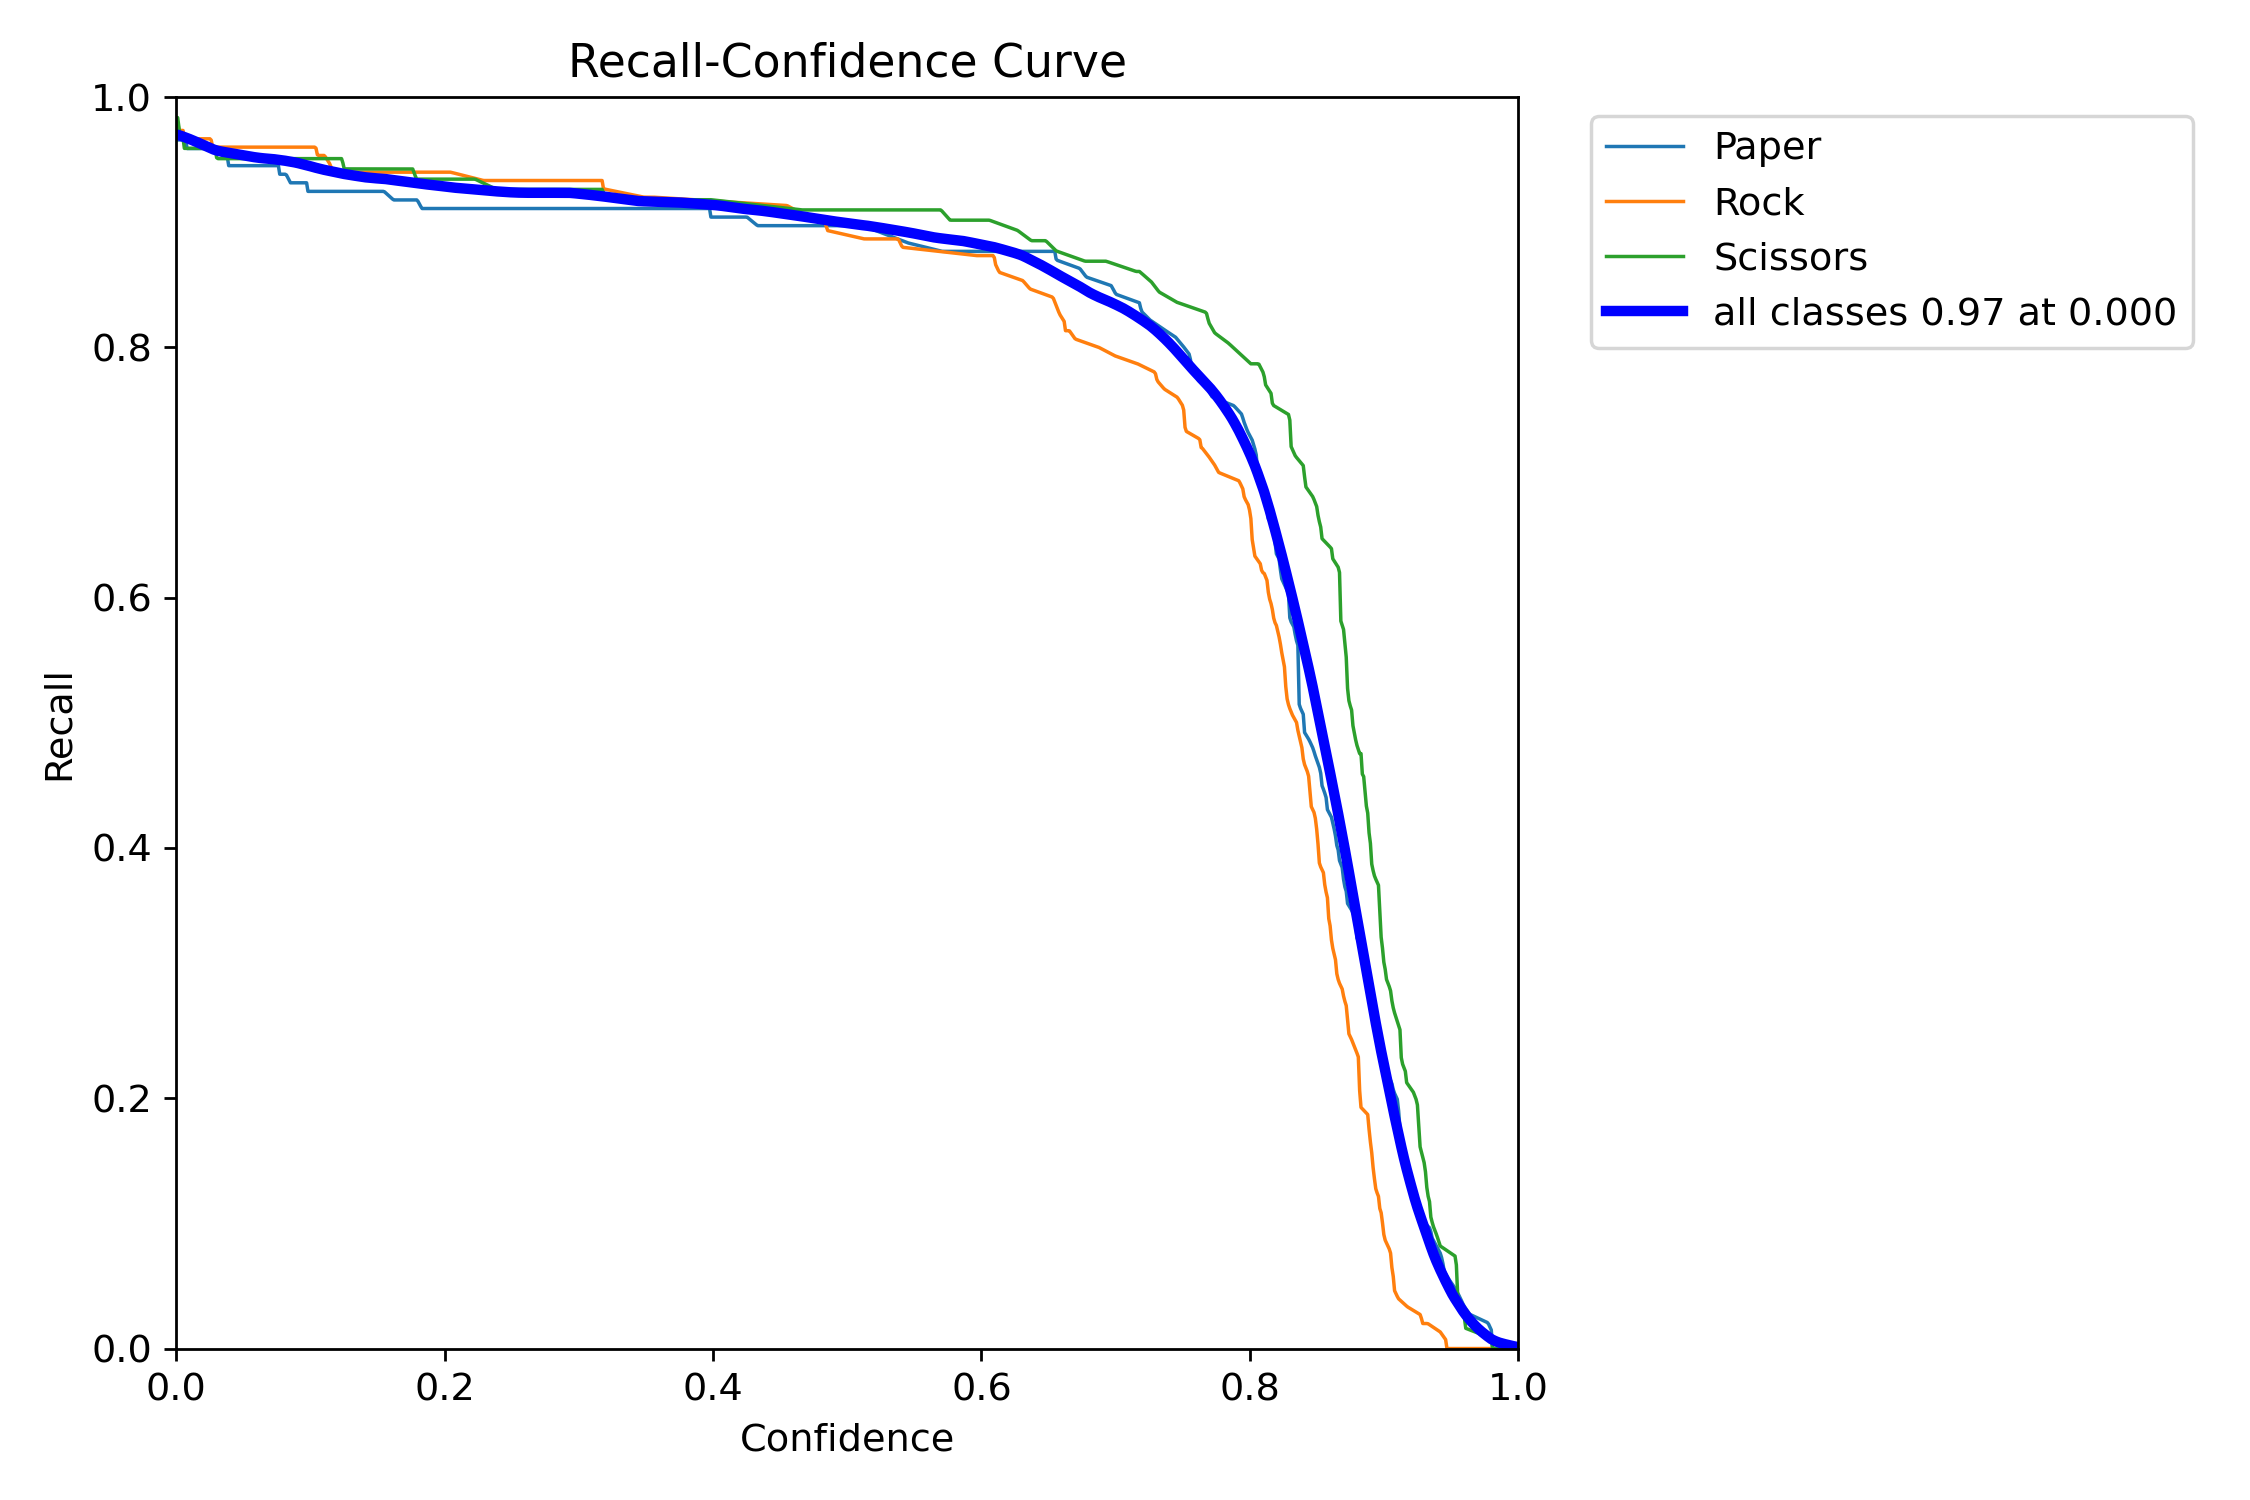

In [12]:
Image(filename='/workspace/attendee/runs/detect/train/R_curve.png', width=600)

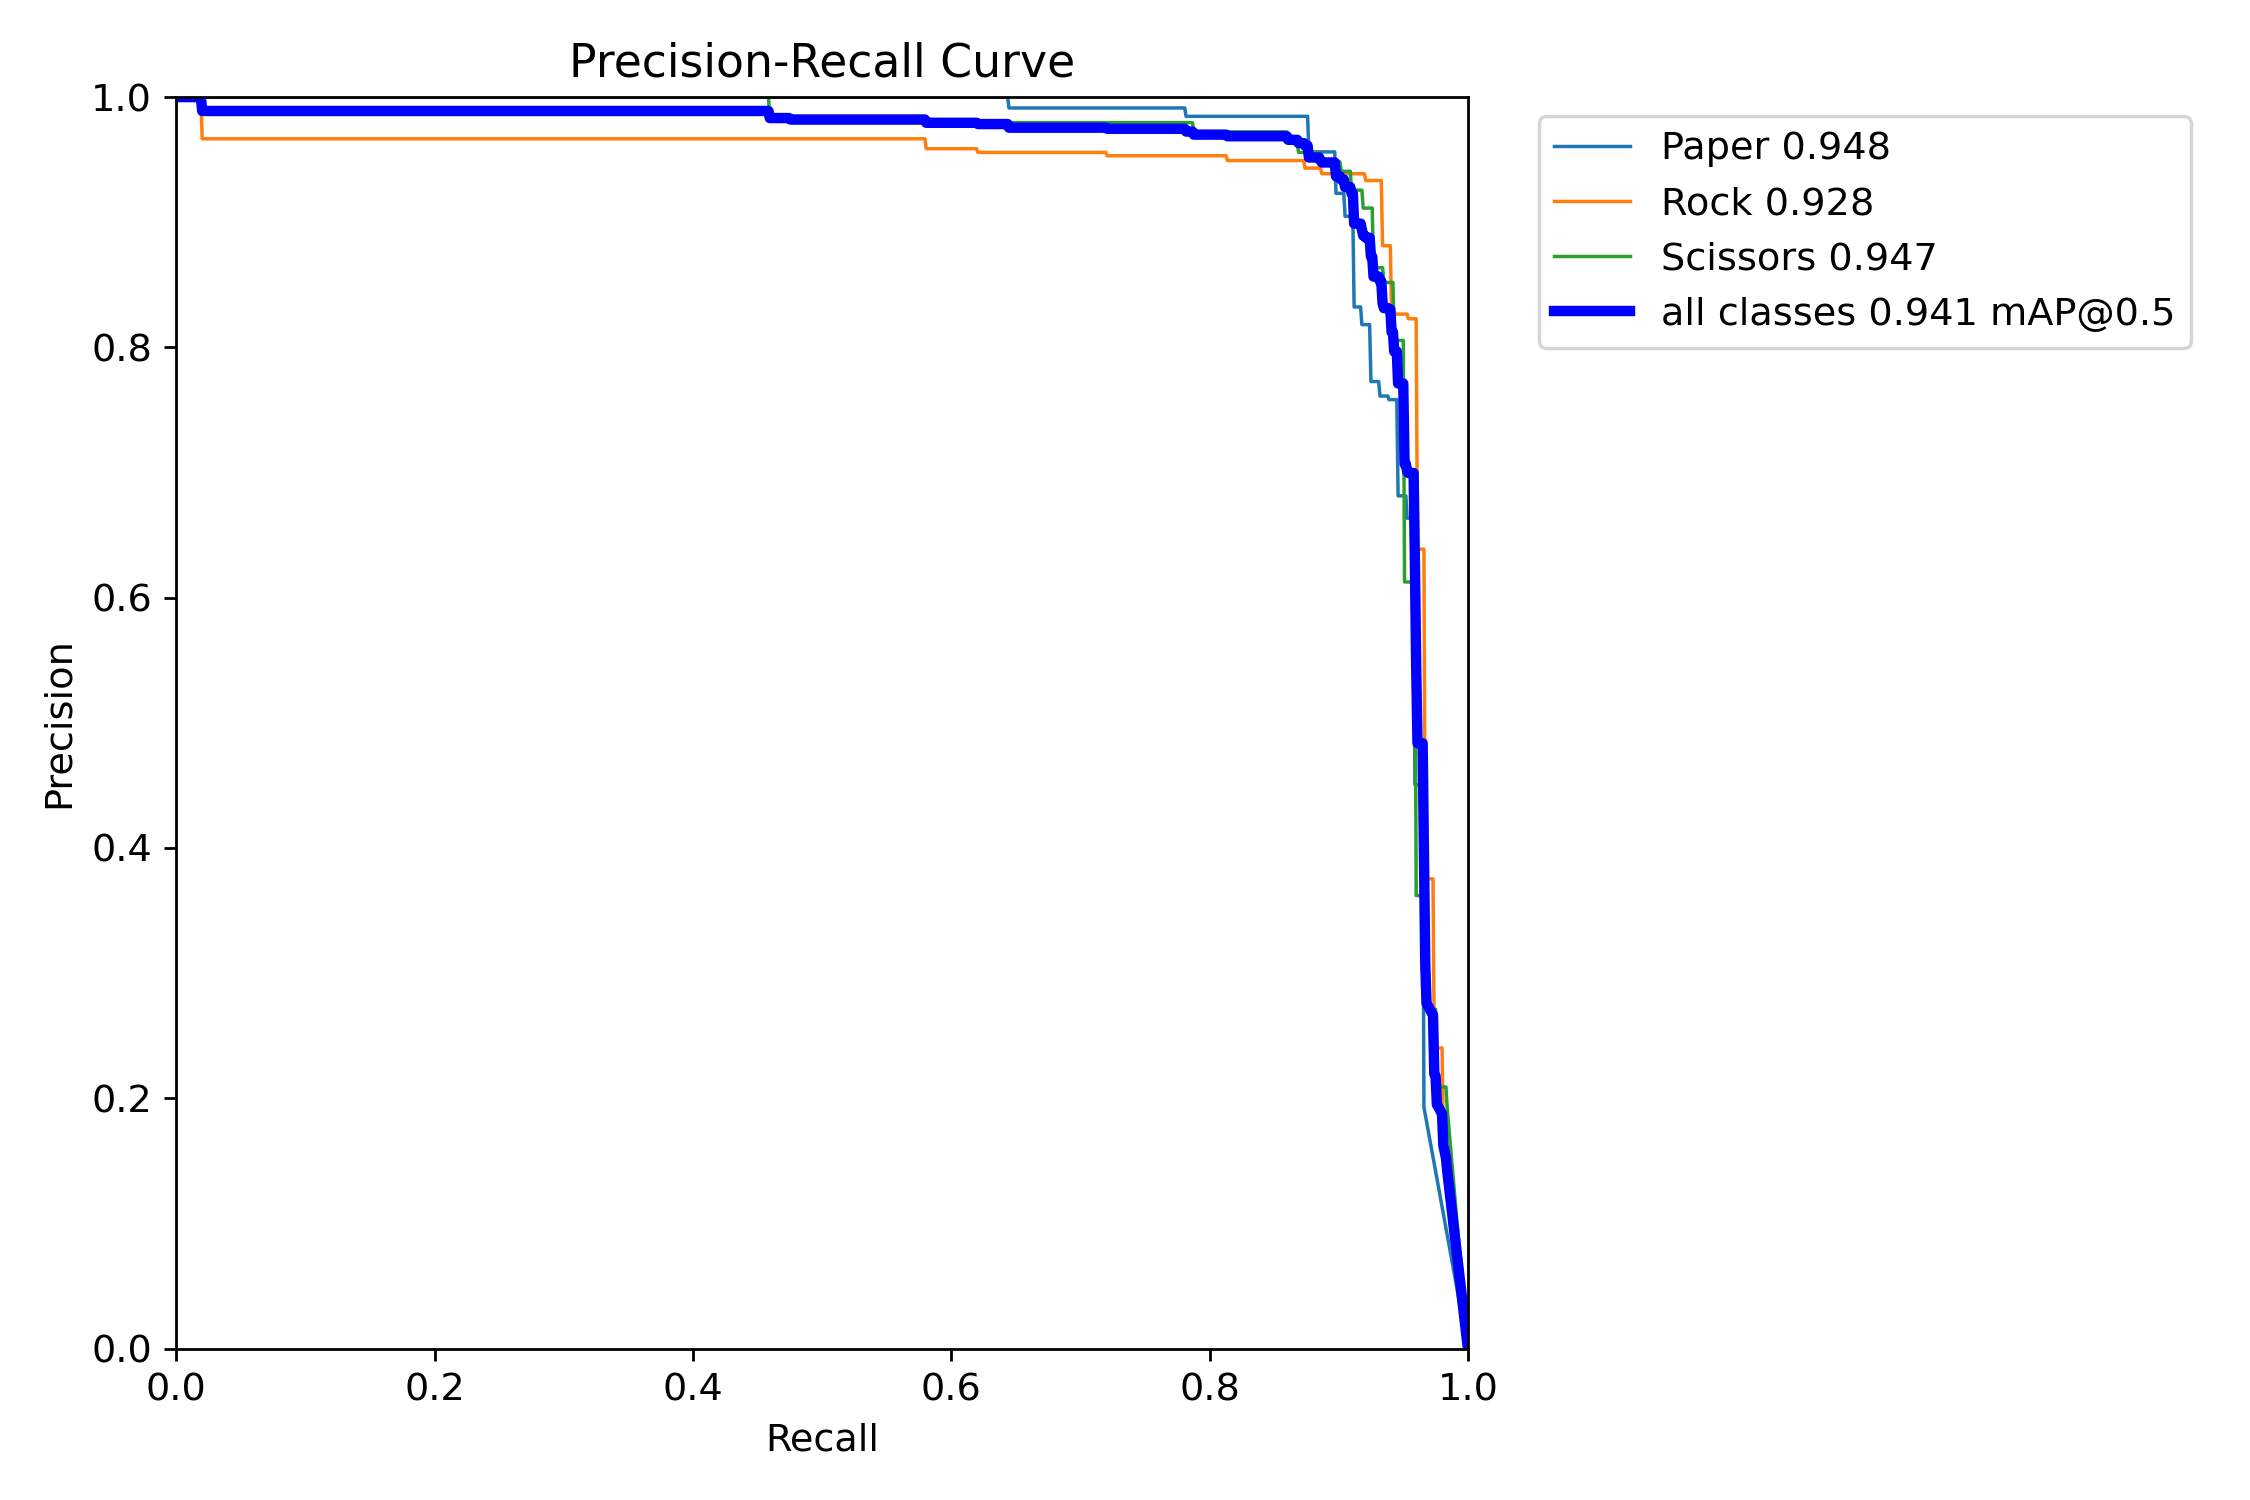

In [15]:
Image(filename='/workspace/attendee/runs/detect/train/PR_curve.png', width=600)

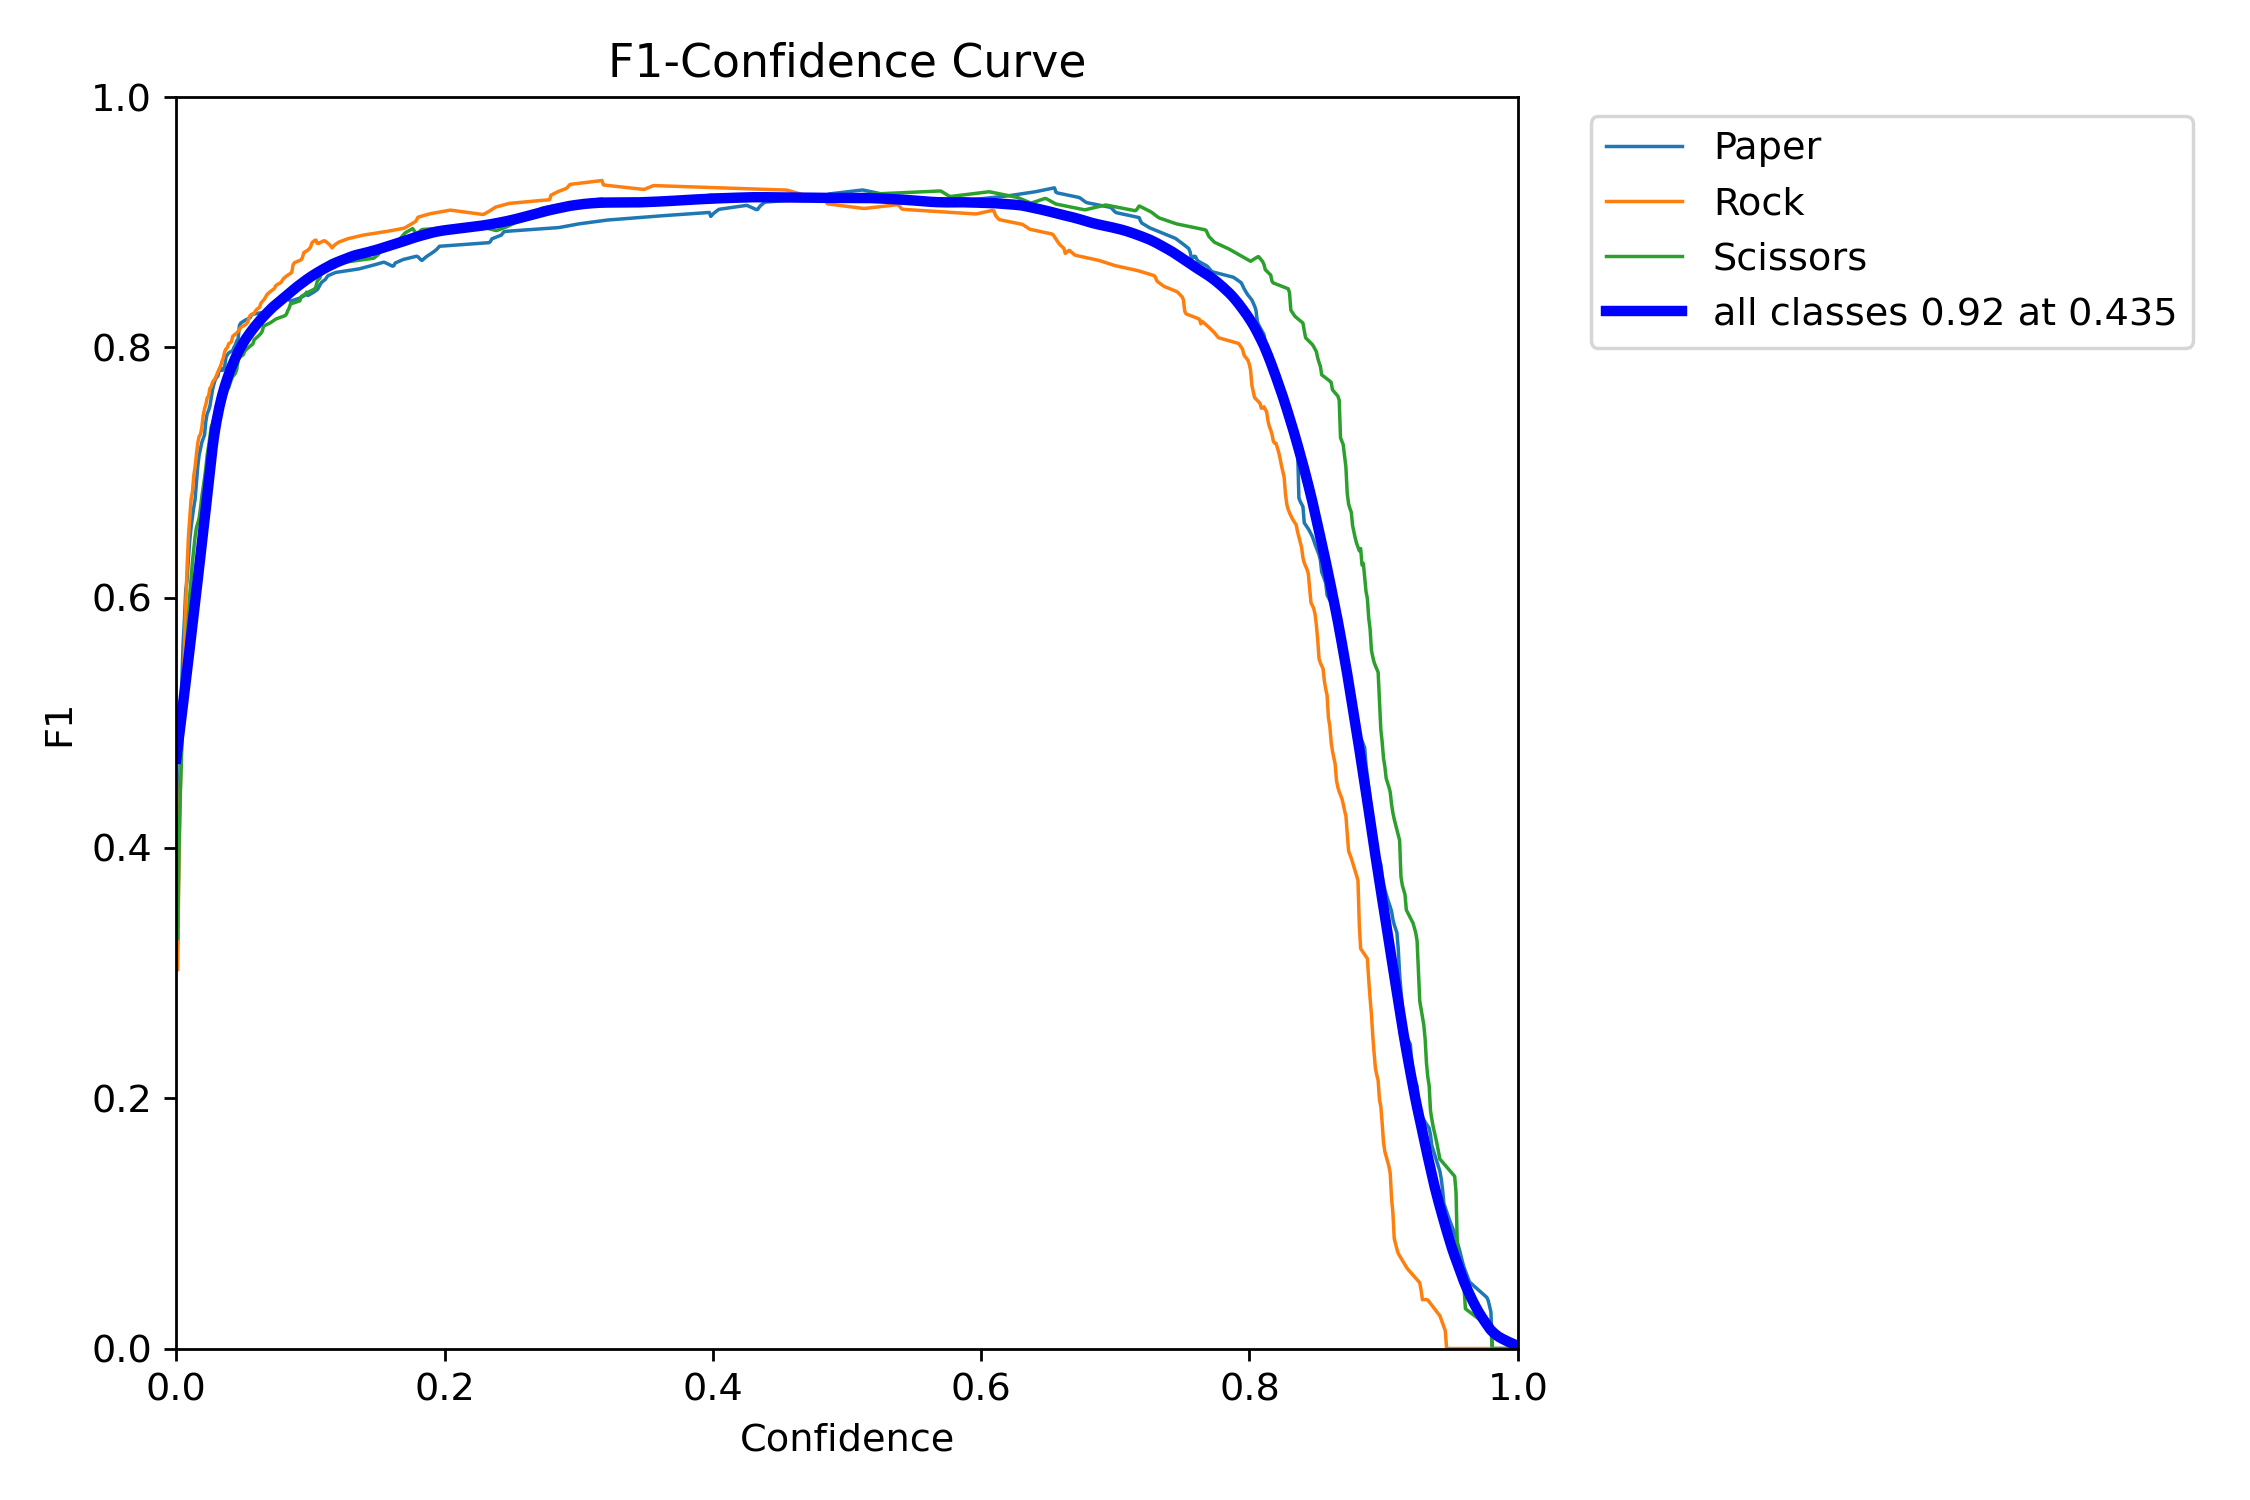

In [14]:
Image(filename='/workspace/attendee/runs/detect/train/F1_curve.png', width=600)

TODO CONCLUSION FROM THESE GRAPHS

### General result graphs
This last image groups together several graphs:

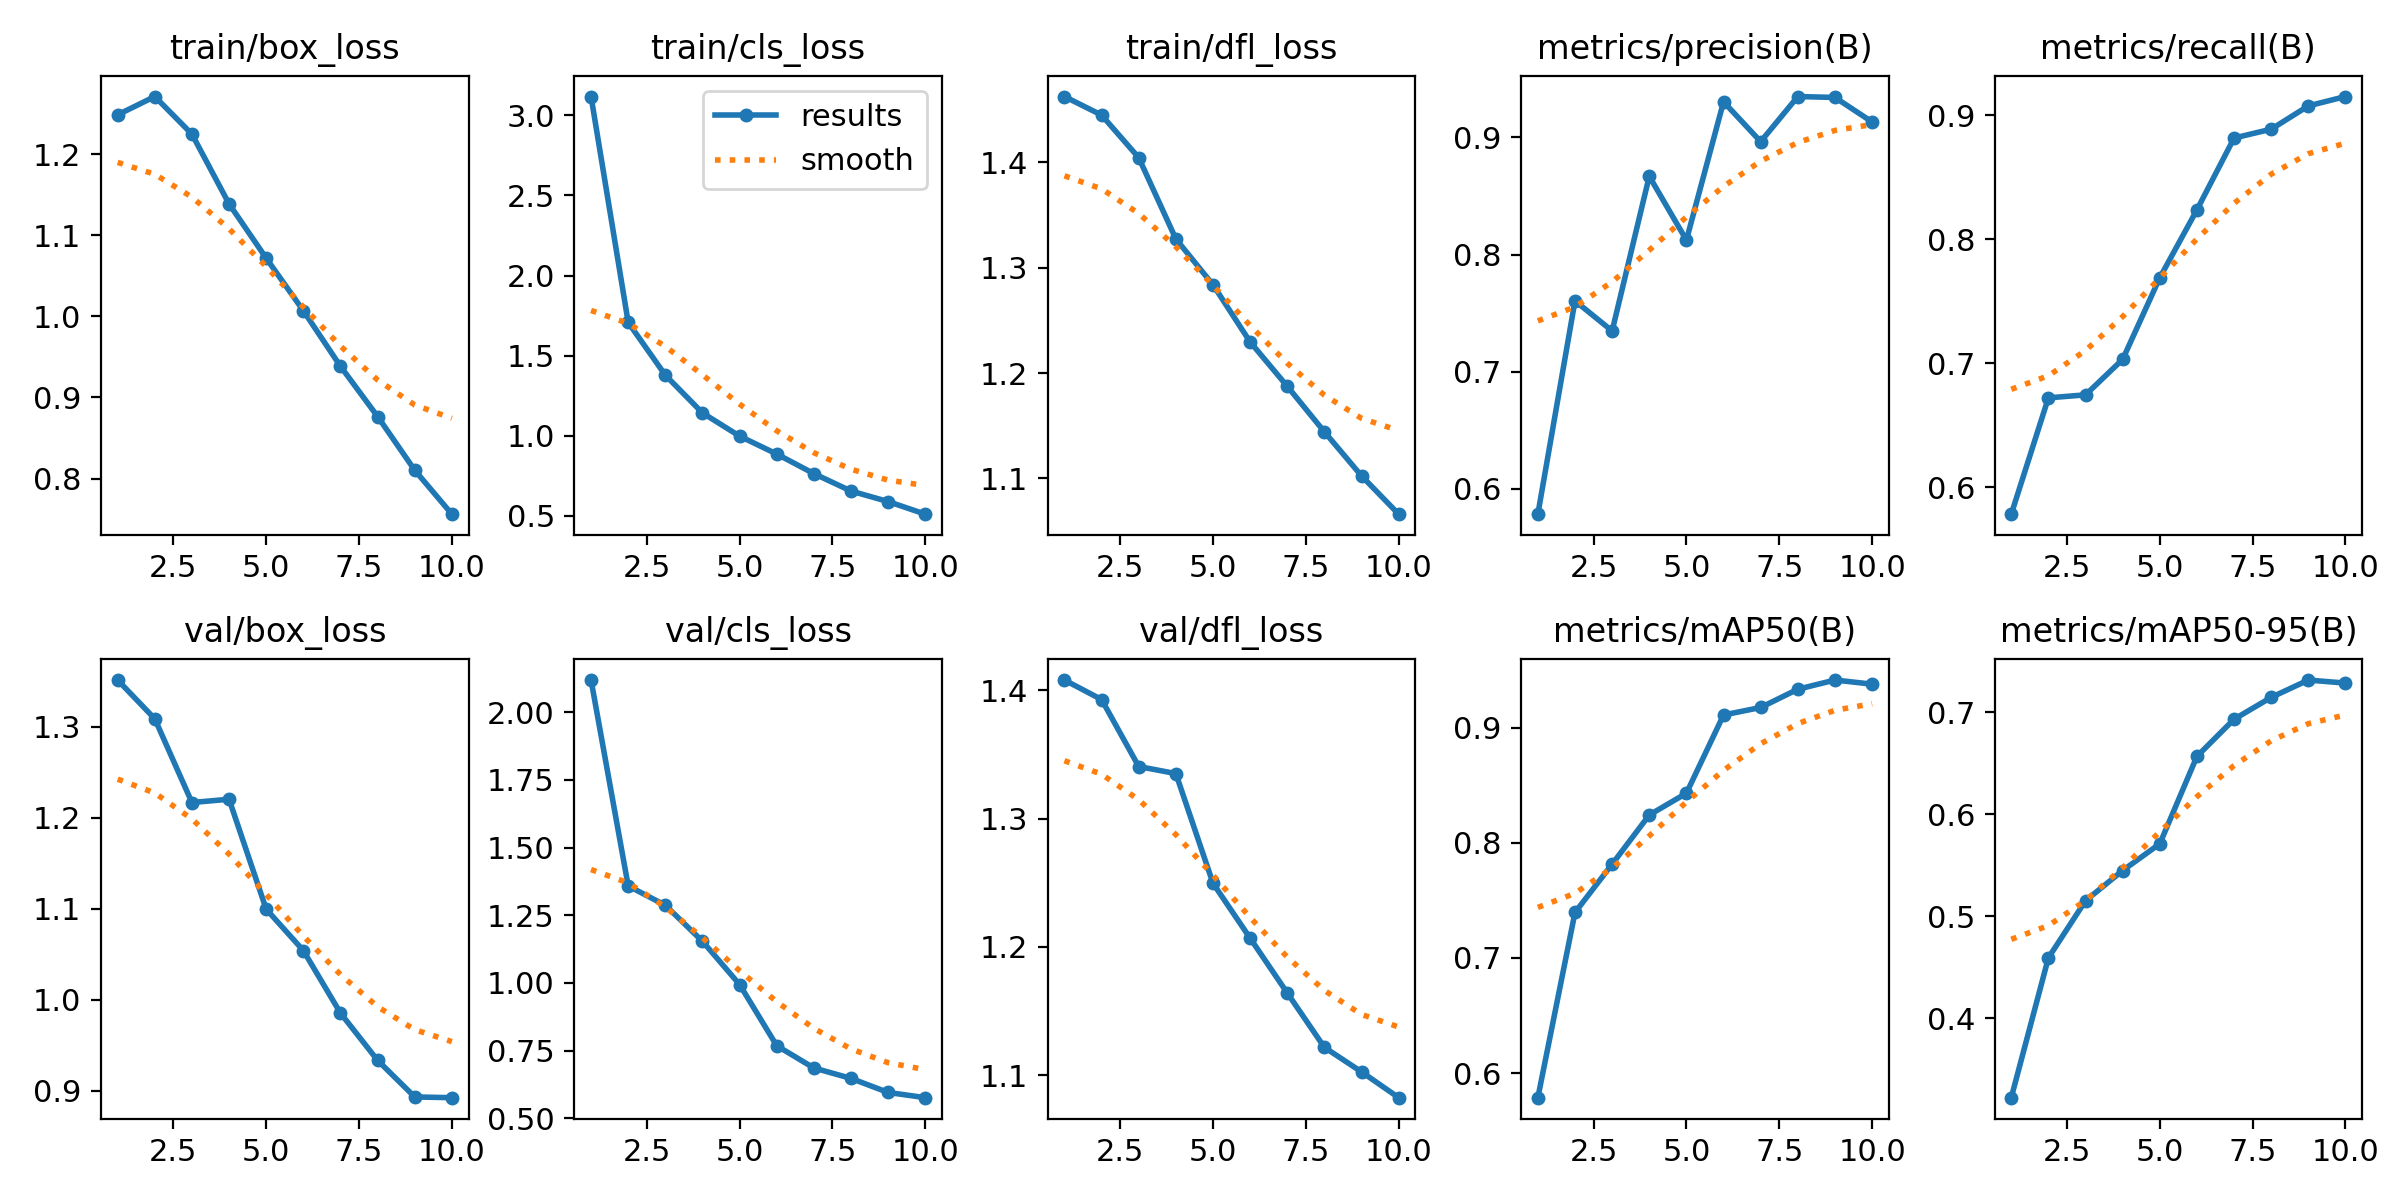

In [17]:
Image(filename='/workspace/attendee/runs/detect/train/results.png', width=1000)

TODO CONCLUSION FROM THESE GRAPHS + SEE IF I KEEP pREVIOUS RECALL & PRECISION GRAPHS

#### Graphs and functions explanation

**Loss functions:**

*For the training set:*

- Box: loss due to a box prediction not exactly covering an object.
- Objectness: loss due to a wrong box-object IoU **[1]** prediction.
- Classification: loss due to deviations from predicting ‘1’ for the correct classes and ‘0’ for all the other classes for the object in that box.

*For the valid set (the same loss functions as for the training data):*

- val Box
- val Objectness
- val Classification

**Precision & Recall:**

- Precision: measures how accurate are the predictions. It is the percentage of your correct predictions
- Recall: measures how good it finds all the positives

*How to calculate Precision and Recall ?*

**Accuracy functions:**

mAP (mean Average Precision) compares the ground-truth bounding box to the detected box and returns a score. The higher the score, the more accurate the model is in its detections.

- mAP@ 0.5：when IoU is set to 0.5, the AP **[2]** of all pictures of each category is calculated, and then all categories are averaged : mAP
- mAP@ 0.5:0.95：represents the average mAP at different IoU thresholds (from 0.5 to 0.95 in steps of 0.05)

**[1] IoU (Intersection over Union)** = measures the overlap between two boundaries. It is used to measure how much the predicted boundary overlaps with the ground truth

*How to calculate IoU ?*

**[2] AP (Average precision)** = popular metric in measuring the accuracy of object detectors. It computes the average precision value for recall value over 0 to 1

## Test your YOLOv8 custom model on the 🪨 / 📃 / ✂️ dataset

Perform inference on the contents of the `/workspace/dataset/test` folder.

In [ ]:
# Test the trained model on an image from the test folder
model.predict('/workspace/attendee/test/images/20220216_221856_jpg.rf.c551cb3856f480cba36d6aa58e3300cd.jpg', save=True, conf=0.5)

## Run YOLOv8 inference on new images

We would like to see whether the model can be generalized to new images, that were not used when the model was trained, and which are not from the dataset.


In [ ]:
model.predict('/workspace/101-AI-and-py/docs/assets/scissors.jpg', save=True, conf=0.5)

You can vizualize the resulting images: `/workspace/attendee/runs/detect/predict`

## Export trained weights for future inference

You can consult the [Ultralytics Export Documentation](https://docs.ultralytics.com/modes/export/) for guidance.

In [ ]:
# Export the weights
exportedWeights = model.export()
print(exportedWeights)

# Copy the final model to the /workspace/attendee/ folder
import shutil
shutil.copy(exportedWeights, '/workspace/attendee/')